# Data Manipulation Exercises

- Data Cleaning & Preparation Exercises
    - Dealing with Missing & Duplicated Data
    - String Manipulation (Regular Expression)
    - Data Transformation

##### Importing Libraries

In [95]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline


==========

## Data Cleaning

##### Importing Data

In [89]:
df=pd.read_csv('mpg-unclean.csv')
df

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,name
0,18.0,8,307.0,130.0 hp,3504,12.0,70,United States,chevrolet chevelle malibu
1,15.0,8,350.0,165.0 hp,3693,11.5,70,United States,buick skylark 320
2,18.0,8,318.0,150.0 hp,3436,11.0,70,United States,plymouth satellite
3,16.0,8,304.0,150.0 hp,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0 hp,3449,10.5,70,usa,FORD TORINO
...,...,...,...,...,...,...,...,...,...
324,12.0,8,429.0,198.0 hp,4952,11.5,73,usa,mercury marquis brougham
325,27.0,4,101.0,83.0 hp,2202,15.3,76,europe,renault 12tl
326,17.0,6,250.0,100.0 hp,3329,15.5,71,usa,chevrolet chevelle malibu
327,14.5,8,351.0,152.0 hp,4215,12.8,76,usa,ford gran torino


##### Inspecting the DataFrame and Identifing the Inconsistent Data

array([<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>,
       <AxesSubplot:>, <AxesSubplot:>], dtype=object)

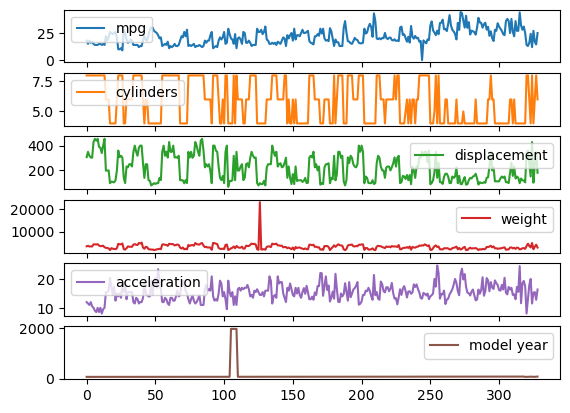

In [96]:
df.plot(subplots=True,)

##### Q. Identify one column label that should be changed and adjust/rename the column label!

In [97]:
df.rename(columns={'origin':'Origin','horsepower':'Horsepower'},inplace=True)

In [92]:
df.columns

Index(['mpg', 'cylinders', 'displacement', 'Horsepower', 'weight',
       'acceleration', 'model year', 'Origin', 'name'],
      dtype='object')

##### Q. Have a closer look to the origin column by analyzing the frequency/count of unique values! Can you find any inconsistency?

In [99]:
df['Origin'].value_counts

<bound method IndexOpsMixin.value_counts of 0      United States
1      United States
2      United States
3                usa
4                usa
           ...      
324              usa
325           europe
326              usa
327              usa
328              usa
Name: Origin, Length: 329, dtype: object>

##### Q. Replace the value "United States" in the origin column! Save the change!

In [101]:
df['Origin'].replace('United States','usa',inplace= True)

In [103]:
df['Origin'].value_counts

<bound method IndexOpsMixin.value_counts of 0         usa
1         usa
2         usa
3         usa
4         usa
        ...  
324       usa
325    europe
326       usa
327       usa
328       usa
Name: Origin, Length: 329, dtype: object>

##### Q. Inspect and identify the problem in the column horsepower!

In [105]:
df['Horsepower'].head()

0    130.0 hp
1    165.0 hp
2    150.0 hp
3    150.0 hp
4    140.0 hp
Name: Horsepower, dtype: object

In [106]:
df['Horsepower']=df['Horsepower'].str.replace('hp','')

In [107]:
df['Horsepower'].head()

0    130.0 
1    165.0 
2    150.0 
3    150.0 
4    140.0 
Name: Horsepower, dtype: object

In [108]:
df['Horsepower'].value_counts().head()

150.0     22
90.0      19
110.0     19
100.0     16
88.0      14
Name: Horsepower, dtype: int64

##### Q. Now you can convert the datatype in the column horsepower! Overwrite the column!

In [109]:
df['Horsepower'].dtype

dtype('O')

In [111]:
df['Horsepower'].astype(int32)

NameError: name 'int32' is not defined

##### Q. What about the 'name' column?

In [113]:
df['name'].head()

0      chevrolet chevelle malibu 
1              buick skylark 320 
2             plymouth satellite 
3                  amc rebel sst 
4                    FORD TORINO 
Name: name, dtype: object

In [114]:
df['name'].str.title()

0        Chevrolet Chevelle Malibu 
1                Buick Skylark 320 
2               Plymouth Satellite 
3                    Amc Rebel Sst 
4                      Ford Torino 
                   ...             
324       Mercury Marquis Brougham 
325                   Renault 12Tl 
326      Chevrolet Chevelle Malibu 
327               Ford Gran Torino 
328          Buick Century Limited 
Name: name, Length: 329, dtype: object

In [115]:
df['name'].str.lstrip()

0      chevrolet chevelle malibu 
1              buick skylark 320 
2             plymouth satellite 
3                  amc rebel sst 
4                    FORD TORINO 
                  ...            
324     mercury marquis brougham 
325                 renault 12tl 
326    chevrolet chevelle malibu 
327             ford gran torino 
328        buick century limited 
Name: name, Length: 329, dtype: object

##### Q. Inspect the column __model_year__ in more detail by analyzing the __frequency/counts__ of unique values! Anything __strange__?

In [116]:
df.head()

,mpg,cylinders,displacement,Horsepower,weight,acceleration,model year,Origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,FORD TORINO


In [117]:
df['model_year']=df['model year'].rename('model_year')

In [118]:
df.columns

Index(['mpg', 'cylinders', 'displacement', 'Horsepower', 'weight',
       'acceleration', 'model year', 'Origin', 'name', 'model_year'],
      dtype='object')

In [119]:
df['model year'].value_counts()

73      33
76      32
70      29
78      28
79      27
75      26
71      25
72      23
82      23
74      22
77      22
80      17
81      17
1973     5
Name: model year, dtype: int64

In [120]:
df['model year']=df['model_year'].replace(1973, 73)

In [121]:
df['model year']

0      70
1      70
2      70
3      70
4      70
       ..
324    73
325    76
326    71
327    76
328    82
Name: model year, Length: 329, dtype: int64

In [122]:
df['model year'].value_counts()

73    38
76    32
70    29
78    28
79    27
75    26
71    25
72    23
82    23
74    22
77    22
80    17
81    17
Name: model year, dtype: int64

##### Q. Inspect the column weight by sorting the values from high to low. Can you see the extreme value?

In [123]:
df['weight'].sort_values(ascending=False)

126    23000
40      5140
92      4997
38      4955
79      4952
       ...  
17      1835
49      1834
188     1825
177     1825
210     1800
Name: weight, Length: 329, dtype: int64

In [129]:
#the outlier of the 'weight column' and then select the entire row
df.loc[df['weight'].idxmax()]


mpg                      26.0
cylinders                   4
displacement             97.0
Horsepower              78.0 
weight                  23000
acceleration             14.5
model year                 74
Origin                 europe
name              opel manta 
model_year                 74
Name: 126, dtype: object

In [133]:
df['weight'].replace(23000,2300,inplace=True)


In [135]:
df.iloc[126]

mpg                      26.0
cylinders                   4
displacement             97.0
Horsepower              78.0 
weight                   2300
acceleration             14.5
model year                 74
Origin                 europe
name              opel manta 
model_year                 74
Name: 126, dtype: object

##### Q. Let's check out the column mpg too

In [137]:
df['mpg']

0      18.0
1      15.0
2      18.0
3      16.0
4      17.0
       ... 
324    12.0
325    27.0
326    17.0
327    14.5
328    25.0
Name: mpg, Length: 329, dtype: float64

##### Q. Select all rows with at least one missing/na value!

In [144]:
df_missing=df.isna().any(axis=1)
df_missing.sum()

0

##### Q. Finding the duplicated records in care names

In [146]:
df.duplicated().sum()

10

In [153]:
(df['name'].duplicated()).sum()

87

In [151]:
df['name'].drop_duplicates()

0        chevrolet chevelle malibu 
1                buick skylark 320 
2               plymouth satellite 
3                    amc rebel sst 
4                      FORD TORINO 
                   ...             
314                ford mustang gl 
315                      vw pickup 
316                  dodge rampage 
317                    ford ranger 
318                 chevrolet s-10 
Name: name, Length: 242, dtype: object

In [152]:
df.to_csv('sarah_data_cleaning.csv')

==========